In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gravitacija
G = 6.674e-11

# Pozicija nam govori o smeru delovanja sile
def gravitacionoUbrzanje(masaTela, pozicija):
    # Da bi izbegli deljenje nulom
    if pozicija == 0:
        return 0;

    return -G * masaTela/ (abs(pozicija)**3) * pozicija

In [3]:
# Gustina Zemlje = const
masaZemlje = 5.972 * 10**24 # kg
poluprecnikZemlje = 6.371 * 10**6 # m

# po formuli za zapreminu sfere 
zapreminaZemlje = 4/3 * np.pi * poluprecnikZemlje**3
print("Zapremina Zemlje = ", zapreminaZemlje)

# gustina je po definiciji odnos mase i zapremine nekog tela 
gustinaZemlje = masaZemlje/zapreminaZemlje
print("Konstantna gustina Zemlje = ", gustinaZemlje)

Zapremina Zemlje =  1.0832069168457536e+21
Konstantna gustina Zemlje =  5513.258738589093


In [4]:
# Iz Shelove teoreme (Shell Theorem) izvlacimo ono sto nam je bitno:
# Kada smo na razdaljini r od centra sfere, sva masa izvan te razdaljine r moze da se zanemari
# => Na taj nacin dobijemo 'ogoljenu' sferu

# Funkcija koja racuna masu 'ogoljene' sfere u svakom trenutku na osnovu udaljenosti objekta od centra:
'''
Po formuli:
    gustina = masa / zapremina
        ==> masa = zapremina * gustina
            Konstantna gustinaZemlje je vec izracunata
'''
def masaSfere(distancaOdCentra):
    return 4/3 * np.pi * distancaOdCentra**3 * gustinaZemlje


In [5]:
# Sada kada mozemo da izracunamo masu zemlje a kada znamo poziciju tela
# mozemo izracunati gravitaciono ubrazanje Zemlje kada joj je gustina konstantna
'''
U ovom slucaju pozicija predstavlja i poluprecnik sfere jer se telo nalazi na obodu sfere
'''
def gravitacionoUbrzanjeConst(pozicija):
    return gravitacionoUbrzanje(masaSfere(abs(pozicija)), pozicija)

In [6]:
# Kako bi ispratili pad objekta kroz zemlju koristimo
# Ojler-Kramarovu petlju koja za svaki korak koristi onaj prethodni
# kako bi izracunala vrednosti koje pratimo.
# U nasem slucaju su to: ubrzanje, brzina i pozicija objekta u odnosu na centar zemlje
'''
    Pracenje cemo raditi 1,5h sto je 5400s.
    Rezultate cemo beleziti posle svake sekunde.
    Pocetna pozicija je jednaka poluprecniku Zemlje.
    Pocetna brzina kao i ubrzanje krecu od 0.
'''
brIteracija = 5400
korak = 1
interval = np.linspace(0, brIteracija*korak, brIteracija)

pozicijeTokomPada = np.zeros(brIteracija)
pozicijeTokomPada[0] = poluprecnikZemlje

brzineTokomPada = np.zeros(brIteracija)

ubrzanjaTokomPada = np.zeros(brIteracija)

for i in range(brIteracija-1):
    ubrzanjaTokomPada[i] = gravitacionoUbrzanjeConst(pozicijeTokomPada[i])
    brzineTokomPada[i+1] = brzineTokomPada[i] + ubrzanjaTokomPada[i] * korak
    pozicijeTokomPada[i+1] = pozicijeTokomPada[i] + brzineTokomPada[i+1] * korak

ubrzanjaTokomPada[brIteracija-1] = gravitacionoUbrzanjeConst(pozicijeTokomPada[brIteracija-1])

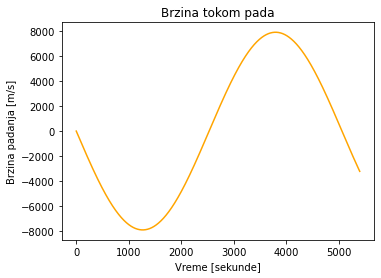

In [7]:
plt.figure(figsize=(19,4))
plt.subplot(132)
plt.plot(interval, brzineTokomPada, color="orange")
plt.title("Brzina tokom pada")
plt.xlabel("Vreme [sekunde]")
plt.ylabel("Brzina padanja [m/s]")
plt.show()

Text(0, 0.5, 'Udaljenost od centra Zemlje [m]')

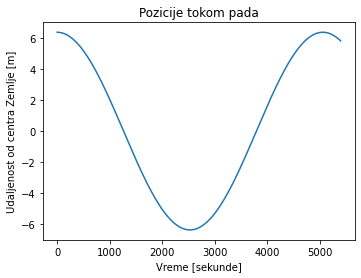

In [8]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(interval, pozicijeTokomPada/(10**6))
plt.title("Pozicije tokom pada")
plt.xlabel("Vreme [sekunde]")
plt.ylabel("Udaljenost od centra Zemlje [m]")

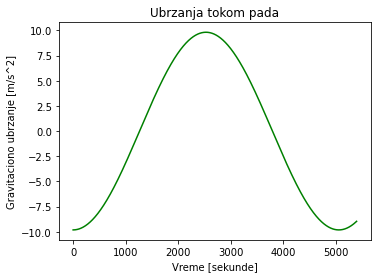

In [9]:
plt.figure(figsize=(19,4))
plt.subplot(133)
plt.plot(interval, ubrzanjaTokomPada, color="green")
plt.title("Ubrzanja tokom pada")
plt.xlabel("Vreme [sekunde]")
plt.ylabel("Gravitaciono ubrzanje [m/s^2]")
plt.show()

In [10]:
print("Vreme (u sekundama) za koje telo prodje kroz Zemlju:", interval[np.argmin(pozicijeTokomPada)])

print("Maksimalna brzina (m/s) koju telo dostigne ", np.amax(brzineTokomPada))

Vreme (u sekundama) za koje telo prodje kroz Zemlju: 2530.468605297277
Maksimalna brzina (m/s) koju telo dostigne  7909.504247322768


In [ ]:
'''
Zakljucak na osnovu grafika:

Mozemo uociti da polozaj i ubrzanje objekta imaju suprotne oblike 
tj da je ubrzanje najvece kada se telo nalazi na kraju svog puta kroz Zemlju. 

Kada ubrzanje postaje vece od nule, negde na polovini putanje, tada i brzina tela pocinje naglo da raste.
'''